In [23]:
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.gridspec as gridspec
#import seaborn as sns
import matplotlib.colors as mcolors
#import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
EoR_colour = mcolors.LinearSegmentedColormap.from_list('EoR_colour',
             [(0, 'white'),(0.33, 'yellow'),(0.5, 'orange'),(0.68, 'red'),
              (0.83333, 'black'),(0.9, 'blue'),(1, 'cyan')])
# plt.register_cmap(cmap=EoR_colour)
plt.rcParams.update({
    'axes.titlesize': 16,     # Title font size
    'axes.labelsize': 16,     # Axes labels font size
    'xtick.labelsize': 16,    # x-tick labels font size
    'ytick.labelsize': 16,    # y-tick labels font size
    'legend.fontsize': 16,    # Legend font size
    'font.size': 16           # Overall font size
})
%matplotlib notebook
   

In [24]:
def plot_LC(ax, data: np.ndarray, elevation_angle = 20 , azimuthal_angle = 150, resolution: int = 1) -> plt.Figure:
    # Extract the surface points with the given resolution
    x, y, z = data.shape
    # Front surface (x=0)
    surface_x0 = data[0, ::resolution, ::resolution]
    x0, y0, z0 = np.meshgrid([0], np.arange(0, y, resolution), np.arange(0, z, resolution), indexing='ij')
    # Back surface (x=max)
    surface_x1 = data[-1, ::resolution, ::resolution]
    x1, y1, z1 = np.meshgrid([x-1], np.arange(0, y, resolution), np.arange(0, z, resolution), indexing='ij')
    # Left surface (y=0)
    surface_y0 = data[::resolution, 0, ::resolution]
    x2, y2, z2 = np.meshgrid(np.arange(0, x, resolution), [0], np.arange(0, z, resolution), indexing='ij')
    # Right surface (y=max)
    surface_y1 = data[::resolution, -1, ::resolution]
    x3, y3, z3 = np.meshgrid(np.arange(0, x, resolution), [y-1], np.arange(0, z, resolution), indexing='ij')
    # Bottom surface (z=0)
    surface_z0 = data[::resolution, ::resolution, 0]
    x4, y4, z4 = np.meshgrid(np.arange(0, x, resolution), np.arange(0, y, resolution), [0], indexing='ij')
    # Top surface (z=max)
    surface_z1 = data[::resolution, ::resolution, -1]
    x5, y5, z5 = np.meshgrid(np.arange(0, x, resolution), np.arange(0, y, resolution), [z-1], indexing='ij')
    
    # Combine all surface points
    X = np.concatenate([x0.ravel(), x1.ravel(), x2.ravel(), x3.ravel(), x4.ravel(), x5.ravel()])
    Y = np.concatenate([y0.ravel(), y1.ravel(), y2.ravel(), y3.ravel(), y4.ravel(), y5.ravel()])
    Z = np.concatenate([z0.ravel(), z1.ravel(), z2.ravel(), z3.ravel(), z4.ravel(), z5.ravel()])
    values = np.concatenate([surface_x0.ravel(), surface_x1.ravel(), surface_y0.ravel(), surface_y1.ravel(), surface_z0.ravel(), surface_z1.ravel()])
    
    # Plotting
    scatter = ax.scatter(X, Y, Z, c=values, cmap='EoR_colour',marker='s', s=10*resolution, vmin=-180, vmax=40)
    
    # Set zoom and angle view
    ax.invert_zaxis()
    ax.view_init(elev=elevation_angle, azim=azimuthal_angle, vertical_axis='x')
    # ax.set_box_aspect([1, 5, 1])
    
    # Removing the axes
    ax.set_axis_off()
    
    return scatter

In [13]:
path = '/remote/gpu01a/heneka/21cmlightcones/pure_simulations/'
os.listdir(path)[0]

'run2323.npz'

In [14]:
data = np.load(path+'run2323.npz')

In [15]:
data.files

['image', 'label', 'tau', 'gxH']

In [16]:
cubo = data['image']
cubo.shape

cube = cubo[:,:,1140:1280]

data = cube
print(data.shape)

(140, 140, 140)


<IPython.core.display.Javascript object>


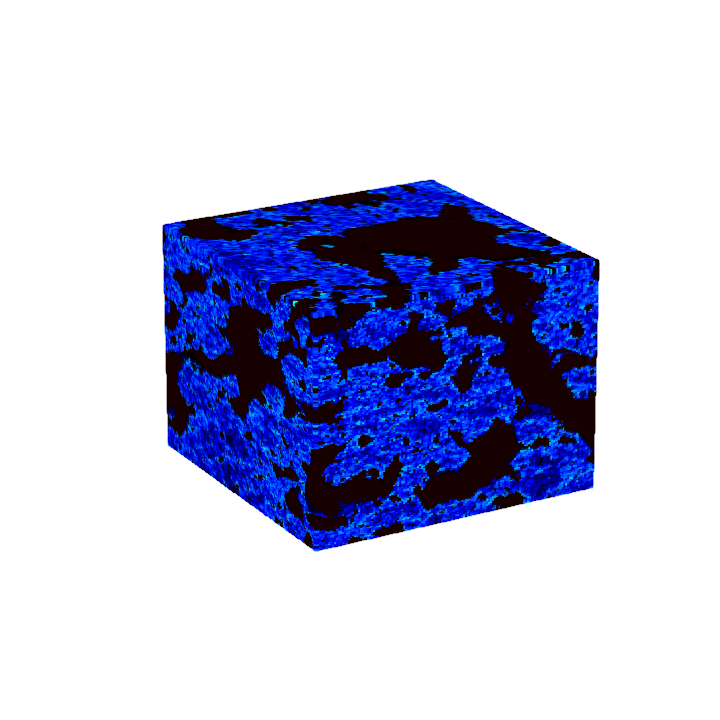

In [38]:
# Animation function
def animate(i, ax, data, elevation_angle, resolution):
    ax.view_init(elev=elevation_angle, azim=i)
    return ax,

# Data setup
data = cube

# Plot setup
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Initial plot
scatter = plot_LC(ax, data, elevation_angle=20, azimuthal_angle=150, resolution=1)

# Create the animation
ani = FuncAnimation(fig, animate, frames=np.arange(0, 360, 1), fargs=(ax, data, 20, 1), interval=50, blit=False)

# Display the animation
plt.show()